In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Newspaper', ylabel='Density'>

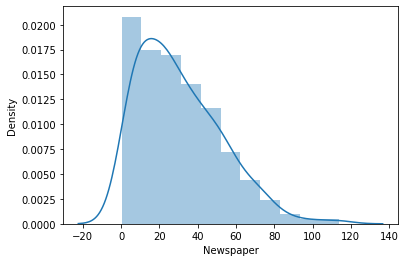

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

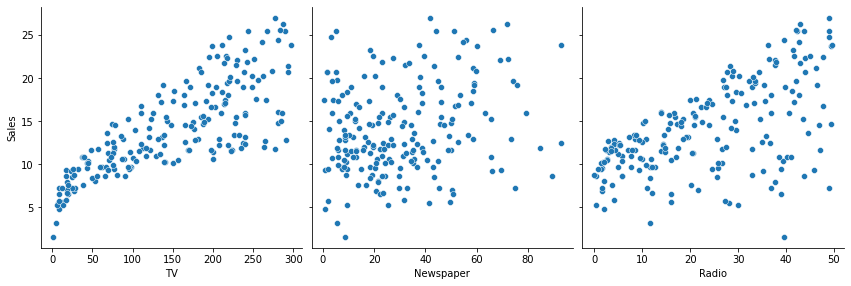

In [16]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

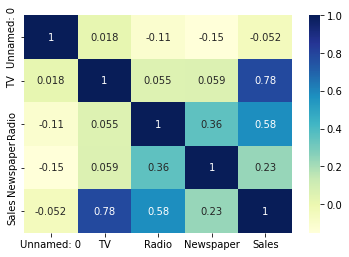

In [17]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [18]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'Radio', 'Sales']


In [20]:
x = data['TV']
y = data['Sales']

In [21]:
x = x.values.reshape(-1,1)

In [22]:
print(x.shape,y.shape)

(200, 1) (200,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [24]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [25]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [27]:
knn_train_pred = knn.predict(x_train)

In [28]:
knn_test_pred = knn.predict(x_test)

In [29]:
print(knn_train_pred, knn_test_pred)

[15.5  19.74 11.44  7.26 12.34 14.82 21.4  12.58 11.44 12.36 19.3  17.02
 18.02 11.36 16.32 17.96 10.1  13.34 12.7  17.02 11.36 18.9  22.34 12.84
 13.86 11.08  7.26 15.58 17.66  8.26 11.8  10.1  11.04  8.2  15.5   8.2
 13.86 19.28 16.42 18.9  14.54  7.18  7.18 18.9  17.72 17.4  17.48  5.12
 16.32 14.54 10.1  16.32  6.   19.88 16.42 20.86 13.64  5.94  6.46  5.94
 10.6  10.24 13.72 17.78 18.02 10.82 20.54 13.26 16.94 19.76 22.34 17.48
 16.42 20.86  9.76 14.36 11.44 18.9  10.38 16.58  4.48 14.4  14.5  17.74
 13.5  18.9  12.58 15.88 19.9  10.1  16.32 10.82 18.88  4.48  7.26 14.5
 22.34 17.02 13.04 14.92 13.24  7.18 15.58 11.08 14.5  19.74 17.58 18.88
 19.28 12.58 14.92 15.28 19.28 19.9  19.88 11.8   8.2  14.36 15.58 13.44
 17.96  5.12 19.22 11.44 12.36  7.18 17.02 17.28 17.02 10.38 17.74 11.44
 14.28  8.2 ] [18.9  14.5  17.74 14.28 17.58 10.26 11.08 14.82 21.42  9.76 22.34 13.44
 10.72 11.44 18.    6.46 11.04 12.7  11.44 11.44 14.82 15.36 14.82 13.72
 17.66 17.42 12.84 12.36  5.94 10.74  8

In [30]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2', 'Test RMSE','Variance'])

In [31]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train, 'Test R2':r2, 'Test RMSE': rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.4414154316236001
RMSE: 3.734523619776245


In [32]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.718325,0.441415,3.734524,0.276909


In [33]:
import statsmodels.api as sm

In [34]:
x_train_constant = sm.add_constant(x_train)

In [35]:
model = sm.OLS(y_train, x_train_constant).fit()

In [36]:
model.params

const    6.919117
x1       0.048533
dtype: float64

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     227.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.62e-30
Time:                        17:48:52   Log-Likelihood:                -346.46
No. Observations:                 134   AIC:                             696.9
Df Residuals:                     132   BIC:                             702.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9191      0.554     12.496      0.0

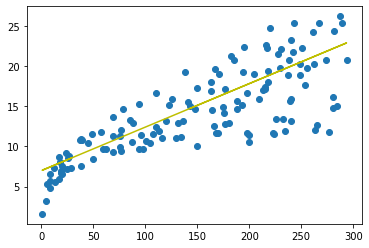

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [39]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

26     1.145533
184   -1.636764
86     1.377824
75     0.960677
143   -1.595657
         ...   
51    -1.091819
47     4.637843
191   -0.683350
153    3.767199
91    -1.007158
Name: Sales, Length: 134, dtype: float64

In [40]:
y_train_pred

array([13.85446661, 19.23676387, 10.62217629,  7.73932275, 11.99565701,
       13.61180218, 17.51869964, 12.1315491 , 10.5736434 , 11.15118476,
       20.71701695, 16.29567087, 18.08653443, 11.58798075, 14.95616317,
       18.57186331,  8.70998051, 11.07838543, 12.39847998, 15.8928479 ,
       11.65107351, 19.67841315, 21.16837281, 13.31089827, 16.61598793,
       10.2678862 ,  7.75388262, 15.4172256 , 17.98461537,  8.07419967,
       11.49091498,  8.83616601, 10.23876647,  8.13729243, 13.77681399,
        8.21979834, 16.61598793, 17.33912796, 20.57627158, 19.60076053,
       16.50921558,  7.86065497,  7.87036155, 19.7900388 , 18.18360021,
       18.30007914, 16.03359328,  7.18119454, 14.90277699, 16.50921558,
        8.77307326, 14.84453753,  7.48695173, 17.48472662, 20.51803211,
       18.97468628, 13.01970094,  7.3267932 ,  7.55975106,  7.33649978,
        9.26325543,  9.70975799, 16.82467935, 20.20256834, 18.0574147 ,
        9.94271586, 19.31441649, 12.89351544, 15.69386306, 17.42

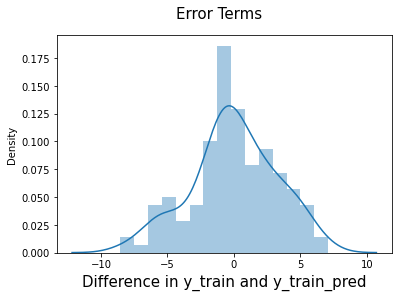

In [41]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

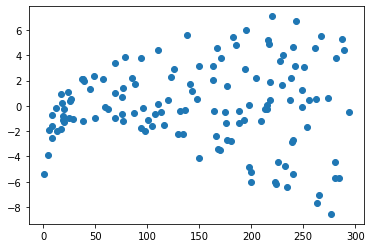

In [42]:
plt.scatter(x_train, res)
plt.show()

In [43]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [44]:
y_pred

array([19.80945195, 14.27184945, 18.55730344, 15.29104009, 20.35787358,
        9.00603112, 10.34553882, 13.6894548 , 20.79952286,  9.08853703,
       21.02762743, 12.79159637, 10.16596714, 10.81145455, 17.14499641,
        7.55489778, 10.20964674, 12.29170763, 10.56393682, 10.62702957,
       13.72828111, 14.51936718, 13.67489493, 16.86835895, 17.94578906,
       16.19375181, 13.28177854, 11.27251698,  7.34135307, 11.90344452,
        8.44790291, 11.30649   , 17.7128312 ,  8.25377136,  9.64666524,
       13.67974822, 13.48076338, 20.68304393, 18.44082451,  9.51562644,
       10.12714083, 16.06271301, 21.13439979, 16.96057143, 17.62061871,
       21.3042649 , 11.56371431, 16.74702673,  8.16155887, 15.8928479 ,
        7.75388262, 16.95571815,  7.27340703, 11.63651364, 17.52355293,
       10.54452366,  9.01088441, 16.57230833, 17.28088849, 17.58664569,
       12.6071714 , 10.48143091, 17.1498497 , 12.76732993, 17.99917523,
       16.58201491])

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.3086130765456945

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.5615596899771312

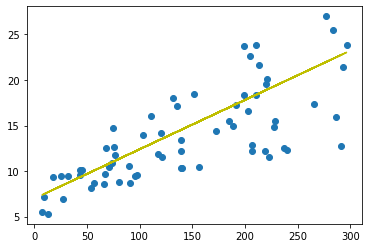

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()